In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
Merged_CVAP = pd.read_csv("/Users/gowthamasokan/Geospatial processing/MA_Block_groups_WP_area_proportional_merge.csv")
Merged_CVAP

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_bla,pop_his,pop_asi,cvap_total,cvap_asi,cvap_bla,cvap_whi,cvap_his,Intersection_area,Percentage_of_Tract
0,0,0,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185579e-14,95.733457
1,1,16,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.740448e-16,4.266543
2,0,1,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,1.845681e-07,2.655062
3,1,200,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,1.428841e-08,0.205543
4,2,932,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,8.235244e-09,0.118466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,1,1475,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,4.731498e-08,0.280330
7992,2,1497,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,7.206035e-06,42.694046
7993,3,1892,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,2.144461e-09,0.012705
7994,4,1991,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,9.616546e-06,56.975747


In [5]:
list(Merged_CVAP.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'STATEFP10',
 'COUNTYFP10',
 'TRACTCE10',
 'BLKGRPCE10',
 'GEOID10',
 'NAMELSAD10',
 'MTFCC10',
 'ALAND10',
 'AWATER10',
 'INTPTLAT10',
 'INTPTLON10',
 'AREA_SQFT',
 'AREA_ACRES_1',
 'POP100_RE',
 'HU100_RE',
 'LOGPL94171',
 'LOGSF1',
 'LOGACS0610',
 'LOGSF1C',
 'SHAPE_AREA_1',
 'SHAPE_LEN_1',
 'WP_NAME',
 'WARD',
 'PRECINCT',
 'DISTRICT',
 'POP_2010',
 'TOWN',
 'TOWN_ID',
 'AREA_SQMI',
 'AREA_ACRES_2',
 'YEAR',
 'SHAPE_AREA_2',
 'SHAPE_LEN_2',
 'geometry',
 'Tract_BlockGroup',
 'geoid',
 'name',
 'median_housing_price',
 'pop',
 'pop_whi',
 'pop_bla',
 'pop_his',
 'pop_asi',
 'cvap_total',
 'cvap_asi',
 'cvap_bla',
 'cvap_whi',
 'cvap_his',
 'Intersection_area',
 'Percentage_of_Tract']

In [4]:
Merged_CVAP[Merged_CVAP['WARD'] == 17]

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_bla,pop_his,pop_asi,cvap_total,cvap_asi,cvap_bla,cvap_whi,cvap_his,Intersection_area,Percentage_of_Tract
81,0,26,25,25,100800,5,250251008005,Block Group 5,G5030,401132.0,...,139.0,107.0,66.0,975.0,35.0,250.0,580.0,110.0,1.193565e-05,27.264459
83,0,27,25,25,100800,4,250251008004,Block Group 4,G5030,778145.0,...,550.0,276.0,0.0,1045.0,0.0,305.0,545.0,80.0,5.569526e-05,65.242712
86,3,1283,25,25,100800,4,250251008004,Block Group 4,G5030,778145.0,...,550.0,276.0,0.0,1045.0,0.0,305.0,545.0,80.0,1.798941e-08,0.021073
87,0,28,25,25,100900,1,250251009001,Block Group 1,G5030,166439.0,...,289.0,146.0,98.0,690.0,45.0,240.0,205.0,145.0,3.025922e-06,16.658418
89,2,594,25,25,100900,1,250251009001,Block Group 1,G5030,166439.0,...,289.0,146.0,98.0,690.0,45.0,240.0,205.0,145.0,1.504577e-05,82.830516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,4,1906,25,25,92400,1,250250924001,Block Group 1,G5030,85542.0,...,798.0,141.0,0.0,600.0,0.0,530.0,0.0,65.0,2.605251e-08,0.278982
7850,1,1794,25,25,100100,7,250251001007,Block Group 7,G5030,190390.0,...,687.0,267.0,0.0,560.0,0.0,415.0,0.0,130.0,1.895184e-07,0.911908
7851,2,1800,25,25,100100,7,250251001007,Block Group 7,G5030,190390.0,...,687.0,267.0,0.0,560.0,0.0,415.0,0.0,130.0,2.976992e-10,0.001432
7867,2,1801,25,25,100200,1,250251002001,Block Group 1,G5030,137720.0,...,910.0,324.0,29.0,870.0,4.0,630.0,25.0,155.0,9.215169e-07,6.130298


## Creating Ward Precinct proportional demographics

In [3]:
demographic_columns = ['pop',
 'pop_whi',
 'pop_bla',
 'pop_his',
 'pop_asi',
 'cvap_total',
 'cvap_asi',
 'cvap_bla',
 'cvap_whi',
 'cvap_his',]

for columns in demographic_columns:
    new_proportional_col = columns + '_WP_proportional'
    
    Merged_CVAP[new_proportional_col] = Merged_CVAP[columns] * (Merged_CVAP['Percentage_of_Tract']/100)
    
Merged_CVAP
    

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_WP_proportional,pop_whi_WP_proportional,pop_bla_WP_proportional,pop_his_WP_proportional,pop_asi_WP_proportional,cvap_total_WP_proportional,cvap_asi_WP_proportional,cvap_bla_WP_proportional,cvap_whi_WP_proportional,cvap_his_WP_proportional
0,0,0,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,17.974767,11.443316,0.000000,0.823069,1.964746,17.390654,0.929272,0.265506,13.275308,1.062025
3,1,200,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,1.391524,0.885889,0.000000,0.063718,0.152102,1.346305,0.071940,0.020554,1.027713,0.082217
4,2,932,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.802016,0.510589,0.000000,0.036725,0.087665,0.775954,0.041463,0.011847,0.592331,0.047386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,1,1475,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,3.663913,0.171001,2.077245,0.787727,0.193428,2.088458,0.084099,1.009188,0.196231,0.812957
7992,2,1497,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,558.011182,26.043368,316.362881,119.970269,29.458892,318.070643,12.808214,153.698566,29.885832,123.812734
7993,3,1892,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.166060,0.007750,0.094147,0.035702,0.008767,0.094655,0.003812,0.045740,0.008894,0.036846
7994,4,1991,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,744.673011,34.755206,422.190284,160.101849,39.313265,424.469314,17.092724,205.112689,39.883023,165.229666


In [4]:
Ward_14_CVAP = Merged_CVAP[Merged_CVAP['WARD'] == 14]
Ward_14_CVAP

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_WP_proportional,pop_whi_WP_proportional,pop_bla_WP_proportional,pop_his_WP_proportional,pop_asi_WP_proportional,cvap_total_WP_proportional,cvap_asi_WP_proportional,cvap_bla_WP_proportional,cvap_whi_WP_proportional,cvap_his_WP_proportional
1315,3,388,25,25,101001,1,250251010011,Block Group 1,G5030,259821.0,...,0.254845,0.008806,0.193723,0.007770,0.000000,0.357404,0.000000,0.305607,0.007770,0.002072
1323,3,1297,25,25,101102,3,250251011023,Block Group 3,G5030,164619.0,...,230.899141,2.990061,192.194465,29.070036,0.000000,104.652129,0.000000,83.057245,3.322290,9.136297
1327,3,396,25,25,981100,1,250259811001,Block Group 1,G5030,693384.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1332,2,397,25,25,981100,2,250259811002,Block Group 2,G5030,246975.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1362,3,388,25,25,101001,1,250251010011,Block Group 1,G5030,259821.0,...,0.254845,0.008806,0.193723,0.007770,0.000000,0.357404,0.000000,0.305607,0.007770,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,5,1975,25,25,100200,3,250251002003,Block Group 3,G5030,131921.0,...,505.938530,6.303496,450.202351,36.162164,13.270519,258.775117,1.327052,238.869339,1.327052,14.929334
7959,0,1005,25,25,91800,2,250250918002,Block Group 2,G5030,89288.0,...,14.962600,0.000000,11.318013,1.234269,0.000000,6.171345,0.000000,5.589142,0.174661,0.407542
7964,0,1006,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.051322,0.002395,0.029097,0.011034,0.002709,0.029254,0.001178,0.014136,0.002749,0.011387
7985,0,1005,25,25,91800,2,250250918002,Block Group 2,G5030,89288.0,...,14.962600,0.000000,11.318013,1.234269,0.000000,6.171345,0.000000,5.589142,0.174661,0.407542


In [12]:
Ward_14_CVAP['pop_bla_WP_proportional'].sum()/Ward_14_CVAP['pop_WP_proportional'].sum()

0.6780434188505544

In [13]:
Merged_CVAP['WARD'].value_counts()

18    734
20    627
21    495
19    474
14    463
22    427
17    426
5     423
7     356
4     354
11    336
16    329
1     326
12    309
13    309
10    309
15    262
8     243
3     224
6     220
9     190
2     160
Name: WARD, dtype: int64

In [14]:
Merged_CVAP['PRECINCT'].value_counts()

5     730
2     716
1     710
7     705
3     679
6     651
8     648
4     636
9     614
10    516
11    329
13    219
12    215
14    155
15     97
16     71
19     54
18     54
17     47
21     47
20     39
22     33
23     16
2A     15
Name: PRECINCT, dtype: int64

In [47]:
Merged_CVAP['PRECINCT'] = Merged_CVAP['PRECINCT'].astype(str)
Merged_CVAP['PRECINCT']

0       12
1       10
2       12
3       14
4       15
        ..
7991     4
7992     1
7993     2
7994     3
7995     7
Name: PRECINCT, Length: 7996, dtype: object

In [4]:
def WardPrecinct_Converter(WardNum, Precinct):  
    if WardNum < 10:
        StrWard = '0' + str(WardNum)
        
        if Precinct == '2A':
            columnName = StrWard + Precinct
            return columnName
        
        #IntPrecinct = int(Precinct)
        
        elif int(Precinct) < 10:
            StrPrec = '0' + str(Precinct)
            columnName = StrWard + StrPrec
            return columnName
        elif int(Precinct) >= 10:
            StrPrec = str(Precinct)
            columnName = StrWard + StrPrec
            return columnName
        

    elif WardNum >= 10:
        StrWard = str(WardNum)
        
        if Precinct == '2A':
            columnName = StrWard + Precinct
            return columnName
        
        #IntPrecinct = int(Precinct)
        
        elif int(Precinct) < 10:
            StrPrec = '0' + str(Precinct)
            columnName = StrWard + StrPrec
            return columnName

        elif int(Precinct) >= 10:
            StrPrec = str(Precinct)
            columnName = StrWard + StrPrec
            return columnName
        
        

In [49]:
WardPrecinct_Converter(8, '2')

'0802'

In [5]:
WP_Code_list = []

for ward, precinct in zip(Merged_CVAP['WARD'],Merged_CVAP['PRECINCT']):
    print(ward,' ',precinct)
    print(type(ward),' ',type(precinct))
    WP_Code = WardPrecinct_Converter(ward, precinct)
    WP_Code_list.append(WP_Code)
    
Merged_CVAP['WP_Code'] = WP_Code_list
Merged_CVAP

21   12
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   14
<class 'int'>   <class 'str'>
21   15
<class 'int'>   <class 'str'>
21   11
<class 'int'>   <class 'str'>
21   13
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   14
<class 'int'>   <class 'str'>
21   11
<class 'int'>   <class 'str'>
21   13
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   9
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   14
<class 'int'>   <class 'str'>
21   15
<class 'int'>   <class 'str'>
21   13
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   3
<class 'int'>   <class 'str'>
21   12
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   10
<class 'i

4   10
<class 'int'>   <class 'str'>
10   4
<class 'int'>   <class 'str'>
10   8
<class 'int'>   <class 'str'>
10   9
<class 'int'>   <class 'str'>
19   3
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
5   10
<class 'int'>   <class 'str'>
5   2
<class 'int'>   <class 'str'>
4   9
<class 'int'>   <class 'str'>
4   7
<class 'int'>   <class 'str'>
19   3
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
19   9
<class 'int'>   <class 'str'>
19   6
<class 'int'>   <class 'str'>
19   5
<class 'int'>   <class 'str'>
19   8
<class 'int'>   <class 'str'>
19   3
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
19   11
<class 'int'>   <class 'str'>
19   13
<class 'int'>   <class 'str'>
20   4
<class 'int'>   <class 'str'>
20   7
<class 'int'>   <class 'str'>
20   1
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
20

16   4
<class 'int'>   <class 'str'>
16   7
<class 'int'>   <class 'str'>
16   5
<class 'int'>   <class 'str'>
16   3
<class 'int'>   <class 'str'>
17   6
<class 'int'>   <class 'str'>
17   9
<class 'int'>   <class 'str'>
16   6
<class 'int'>   <class 'str'>
16   4
<class 'int'>   <class 'str'>
16   3
<class 'int'>   <class 'str'>
17   6
<class 'int'>   <class 'str'>
16   4
<class 'int'>   <class 'str'>
16   1
<class 'int'>   <class 'str'>
16   4
<class 'int'>   <class 'str'>
16   5
<class 'int'>   <class 'str'>
16   2
<class 'int'>   <class 'str'>
16   1
<class 'int'>   <class 'str'>
16   6
<class 'int'>   <class 'str'>
16   4
<class 'int'>   <class 'str'>
16   7
<class 'int'>   <class 'str'>
16   5
<class 'int'>   <class 'str'>
16   6
<class 'int'>   <class 'str'>
16   7
<class 'int'>   <class 'str'>
16   5
<class 'int'>   <class 'str'>
16   9
<class 'int'>   <class 'str'>
16   7
<class 'int'>   <class 'str'>
16   5
<class 'int'>   <class 'str'>
16   10
<class 'int'>   <class 'str'>


<class 'int'>   <class 'str'>
20   1
<class 'int'>   <class 'str'>
20   4
<class 'int'>   <class 'str'>
20   1
<class 'int'>   <class 'str'>
20   6
<class 'int'>   <class 'str'>
20   4
<class 'int'>   <class 'str'>
20   7
<class 'int'>   <class 'str'>
20   1
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
20   8
<class 'int'>   <class 'str'>
19   2
<class 'int'>   <class 'str'>
19   11
<class 'int'>   <class 'str'>
19   13
<class 'int'>   <class 'str'>
20   4
<class 'int'>   <class 'str'>
20   7
<class 'int'>   <class 'str'>
20   1
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
19   13
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
18   7
<class 'int'>   <class 'str'>
19   10
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
20   10
<class 'int'>   <class 'str'>
20   11
<class 'int'>   <class 'str'>
20   8
<class 'int'>   <class 'str'>
19   13
<class 'int'>   <class 'str'>
20   2
<class 'int'>   <class 'str'>
1

<class 'int'>   <class 'str'>
18   4
<class 'int'>   <class 'str'>
18   21
<class 'int'>   <class 'str'>
18   6
<class 'int'>   <class 'str'>
18   5
<class 'int'>   <class 'str'>
18   4
<class 'int'>   <class 'str'>
17   11
<class 'int'>   <class 'str'>
16   6
<class 'int'>   <class 'str'>
16   8
<class 'int'>   <class 'str'>
16   11
<class 'int'>   <class 'str'>
17   4
<class 'int'>   <class 'str'>
17   13
<class 'int'>   <class 'str'>
16   11
<class 'int'>   <class 'str'>
17   4
<class 'int'>   <class 'str'>
17   13
<class 'int'>   <class 'str'>
17   4
<class 'int'>   <class 'str'>
17   12
<class 'int'>   <class 'str'>
18   1
<class 'int'>   <class 'str'>
17   14
<class 'int'>   <class 'str'>
17   4
<class 'int'>   <class 'str'>
17   12
<class 'int'>   <class 'str'>
17   9
<class 'int'>   <class 'str'>
17   11
<class 'int'>   <class 'str'>
17   8
<class 'int'>   <class 'str'>
17   4
<class 'int'>   <class 'str'>
17   12
<class 'int'>   <class 'str'>
17   7
<class 'int'>   <class 'str

12   3
<class 'int'>   <class 'str'>
11   2
<class 'int'>   <class 'str'>
12   1
<class 'int'>   <class 'str'>
9   5
<class 'int'>   <class 'str'>
12   8
<class 'int'>   <class 'str'>
11   3
<class 'int'>   <class 'str'>
12   3
<class 'int'>   <class 'str'>
11   2
<class 'int'>   <class 'str'>
9   5
<class 'int'>   <class 'str'>
12   5
<class 'int'>   <class 'str'>
12   2
<class 'int'>   <class 'str'>
12   3
<class 'int'>   <class 'str'>
12   1
<class 'int'>   <class 'str'>
12   5
<class 'int'>   <class 'str'>
12   4
<class 'int'>   <class 'str'>
12   3
<class 'int'>   <class 'str'>
12   1
<class 'int'>   <class 'str'>
12   5
<class 'int'>   <class 'str'>
12   4
<class 'int'>   <class 'str'>
12   6
<class 'int'>   <class 'str'>
12   8
<class 'int'>   <class 'str'>
11   3
<class 'int'>   <class 'str'>
12   3
<class 'int'>   <class 'str'>
12   5
<class 'int'>   <class 'str'>
12   2
<class 'int'>   <class 'str'>
12   6
<class 'int'>   <class 'str'>
12   3
<class 'int'>   <class 'str'>
12 

<class 'int'>   <class 'str'>
9   2
<class 'int'>   <class 'str'>
4   5
<class 'int'>   <class 'str'>
4   8
<class 'int'>   <class 'str'>
9   4
<class 'int'>   <class 'str'>
9   3
<class 'int'>   <class 'str'>
18   19
<class 'int'>   <class 'str'>
18   13
<class 'int'>   <class 'str'>
18   16
<class 'int'>   <class 'str'>
18   18
<class 'int'>   <class 'str'>
18   19
<class 'int'>   <class 'str'>
18   22
<class 'int'>   <class 'str'>
18   13
<class 'int'>   <class 'str'>
18   18
<class 'int'>   <class 'str'>
18   12
<class 'int'>   <class 'str'>
18   13
<class 'int'>   <class 'str'>
18   16
<class 'int'>   <class 'str'>
18   18
<class 'int'>   <class 'str'>
18   15
<class 'int'>   <class 'str'>
18   14
<class 'int'>   <class 'str'>
18   13
<class 'int'>   <class 'str'>
18   18
<class 'int'>   <class 'str'>
18   15
<class 'int'>   <class 'str'>
18   14
<class 'int'>   <class 'str'>
18   8
<class 'int'>   <class 'str'>
18   5
<class 'int'>   <class 'str'>
18   13
<class 'int'>   <class '

22   11
<class 'int'>   <class 'str'>
22   10
<class 'int'>   <class 'str'>
22   12
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   6
<class 'int'>   <class 'str'>
22   10
<class 'int'>   <class 'str'>
22   3
<class 'int'>   <class 'str'>
22   9
<class 'int'>   <class 'str'>
22   1
<class 'int'>   <class 'str'>
22   2
<class 'int'>   <class 'str'>
22   5
<class 'int'>   <class 'str'>
22   12
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
21   6
<class 'int'>   <class 'str'>
22   6
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
21   2
<class 'int'>   <class 'str'>
5   10
<class 'int'>   <class 'str'>
22   1
<class 'int'>   <class 'str'>
3   5
<class 'int'>   <class 'str'>
22   5
<class 'int'>   <clas

6   9
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
6   5
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
7   6
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
6   3
<class 'int'>   <class 'str'>
6   2
<class 'int'>   <class 'str'>
6   4
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
6   3
<class 'int'>   <class 'str'>
6   2
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
6   3
<class 'int'>   <class 'str'>
6   2
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
6   2
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
7   6
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
7   8
<class 'int'>   <class 'str'>
8   1
<class 'int'>   <class 'str'>
8   2
<class 'int'>   <class 'str'>
6   1
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
6   4
<class 'int'>   <class 'str'>
6   7
<class 'int'>   <class

<class 'int'>   <class 'str'>
13   8
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
13   3
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
13   3
<class 'int'>   <class 'str'>
13   10
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   8
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   3
<class 'int'>   <class 'str'>
7   4
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   6
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
7   8
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   6
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
7   3
<class 'int'>   <class 'str'>
7   4
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   6
<class 'int'>   <class 'str'>
7   5
<class 'int'>   <class 'str'>
7   3
<class 'int'>   <class 'str'>
7   7
<class 'int'>   <class 'str'>
7   8
<class 'int'>   <class 'str'>
13   3
<class 'int'>   <class

15   4
<class 'int'>   <class 'str'>
15   3
<class 'int'>   <class 'str'>
15   4
<class 'int'>   <class 'str'>
15   9
<class 'int'>   <class 'str'>
15   3
<class 'int'>   <class 'str'>
15   7
<class 'int'>   <class 'str'>
15   4
<class 'int'>   <class 'str'>
15   6
<class 'int'>   <class 'str'>
15   9
<class 'int'>   <class 'str'>
15   3
<class 'int'>   <class 'str'>
14   1
<class 'int'>   <class 'str'>
15   4
<class 'int'>   <class 'str'>
15   1
<class 'int'>   <class 'str'>
15   2
<class 'int'>   <class 'str'>
15   3
<class 'int'>   <class 'str'>
15   7
<class 'int'>   <class 'str'>
13   10
<class 'int'>   <class 'str'>
16   2
<class 'int'>   <class 'str'>
13   9
<class 'int'>   <class 'str'>
15   4
<class 'int'>   <class 'str'>
15   6
<class 'int'>   <class 'str'>
16   2
<class 'int'>   <class 'str'>
15   6
<class 'int'>   <class 'str'>
15   8
<class 'int'>   <class 'str'>
15   9
<class 'int'>   <class 'str'>
16   1
<class 'int'>   <class 'str'>
13   6
<class 'int'>   <class 'str'>


1   4
<class 'int'>   <class 'str'>
1   3
<class 'int'>   <class 'str'>
1   4
<class 'int'>   <class 'str'>
1   6
<class 'int'>   <class 'str'>
1   7
<class 'int'>   <class 'str'>
1   3
<class 'int'>   <class 'str'>
1   5
<class 'int'>   <class 'str'>
1   4
<class 'int'>   <class 'str'>
1   6
<class 'int'>   <class 'str'>
1   5
<class 'int'>   <class 'str'>
1   4
<class 'int'>   <class 'str'>
1   6
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   8
<class 'int'>   <class 'str'>
22   10
<class 'int'>   <class 'str'>
22   7

14   2
<class 'int'>   <class 'str'>
17   5
<class 'int'>   <class 'str'>
17   7
<class 'int'>   <class 'str'>
14   10
<class 'int'>   <class 'str'>
14   5
<class 'int'>   <class 'str'>
14   13
<class 'int'>   <class 'str'>
17   7
<class 'int'>   <class 'str'>
17   10
<class 'int'>   <class 'str'>
14   10
<class 'int'>   <class 'str'>
17   8
<class 'int'>   <class 'str'>
17   5
<class 'int'>   <class 'str'>
17   7
<class 'int'>   <class 'str'>
17   10
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   11
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   8
<class 'int'>   <class 'str'>
22   10
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <class 'str'>
22   4
<class 'int'>   <class 'str'>
22   7
<class 'int'>   <class 'str'>
22   13
<class 'int'>   <cla

21   8
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   9
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   6
<class 'int'>   <class 'str'>
21   9
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   4
<class 'int'>   <class 'str'>
21   6
<class 'int'>   <class 'str'>
21   9
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   5
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   10
<class 'int'>   <class 'str'>
21   9
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   5
<class 'int'>   <class 'str'>
21   4
<class 'int'>   <class 'str'>
21   6
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
21   8
<class 'int'>   <class 'str'>
21   3
<class 'int'>   <class 'str'>
21   5
<class 'int'>   <class 'str'>
21   7
<class 'int'>   <class 'str'>
14   2
<class 'int'>   <class 'str'>

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_whi_WP_proportional,pop_bla_WP_proportional,pop_his_WP_proportional,pop_asi_WP_proportional,cvap_total_WP_proportional,cvap_asi_WP_proportional,cvap_bla_WP_proportional,cvap_whi_WP_proportional,cvap_his_WP_proportional,WP_Code
0,0,0,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112
1,1,16,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110
2,0,1,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,11.443316,0.000000,0.823069,1.964746,17.390654,0.929272,0.265506,13.275308,1.062025,2112
3,1,200,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.885889,0.000000,0.063718,0.152102,1.346305,0.071940,0.020554,1.027713,0.082217,2114
4,2,932,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.510589,0.000000,0.036725,0.087665,0.775954,0.041463,0.011847,0.592331,0.047386,2115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,1,1475,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.171001,2.077245,0.787727,0.193428,2.088458,0.084099,1.009188,0.196231,0.812957,1504
7992,2,1497,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,26.043368,316.362881,119.970269,29.458892,318.070643,12.808214,153.698566,29.885832,123.812734,1501
7993,3,1892,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.007750,0.094147,0.035702,0.008767,0.094655,0.003812,0.045740,0.008894,0.036846,1502
7994,4,1991,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,34.755206,422.190284,160.101849,39.313265,424.469314,17.092724,205.112689,39.883023,165.229666,1503


In [6]:
Merged_CVAP

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_whi_WP_proportional,pop_bla_WP_proportional,pop_his_WP_proportional,pop_asi_WP_proportional,cvap_total_WP_proportional,cvap_asi_WP_proportional,cvap_bla_WP_proportional,cvap_whi_WP_proportional,cvap_his_WP_proportional,WP_Code
0,0,0,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112
1,1,16,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110
2,0,1,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,11.443316,0.000000,0.823069,1.964746,17.390654,0.929272,0.265506,13.275308,1.062025,2112
3,1,200,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.885889,0.000000,0.063718,0.152102,1.346305,0.071940,0.020554,1.027713,0.082217,2114
4,2,932,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,...,0.510589,0.000000,0.036725,0.087665,0.775954,0.041463,0.011847,0.592331,0.047386,2115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,1,1475,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.171001,2.077245,0.787727,0.193428,2.088458,0.084099,1.009188,0.196231,0.812957,1504
7992,2,1497,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,26.043368,316.362881,119.970269,29.458892,318.070643,12.808214,153.698566,29.885832,123.812734,1501
7993,3,1892,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,0.007750,0.094147,0.035702,0.008767,0.094655,0.003812,0.045740,0.008894,0.036846,1502
7994,4,1991,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,...,34.755206,422.190284,160.101849,39.313265,424.469314,17.092724,205.112689,39.883023,165.229666,1503


In [54]:
list(Merged_CVAP.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'STATEFP10',
 'COUNTYFP10',
 'TRACTCE10',
 'BLKGRPCE10',
 'GEOID10',
 'NAMELSAD10',
 'MTFCC10',
 'ALAND10',
 'AWATER10',
 'INTPTLAT10',
 'INTPTLON10',
 'AREA_SQFT',
 'AREA_ACRES_1',
 'POP100_RE',
 'HU100_RE',
 'LOGPL94171',
 'LOGSF1',
 'LOGACS0610',
 'LOGSF1C',
 'SHAPE_AREA_1',
 'SHAPE_LEN_1',
 'WP_NAME',
 'WARD',
 'PRECINCT',
 'DISTRICT',
 'POP_2010',
 'TOWN',
 'TOWN_ID',
 'AREA_SQMI',
 'AREA_ACRES_2',
 'YEAR',
 'SHAPE_AREA_2',
 'SHAPE_LEN_2',
 'geometry',
 'Tract_BlockGroup',
 'geoid',
 'name',
 'median_housing_price',
 'pop',
 'pop_whi',
 'pop_bla',
 'pop_his',
 'pop_asi',
 'cvap_total',
 'cvap_asi',
 'cvap_bla',
 'cvap_whi',
 'cvap_his',
 'Intersection_area',
 'Percentage_of_Tract',
 'pop_WP_proportional',
 'pop_whi_WP_proportional',
 'pop_bla_WP_proportional',
 'pop_his_WP_proportional',
 'pop_asi_WP_proportional',
 'cvap_total_WP_proportional',
 'cvap_asi_WP_proportional',
 'cvap_bla_WP_proportional',
 'cvap_whi_WP_proportional',
 'cvap_his_WP_pro

In [61]:
Ward_14_CVAP = Merged_CVAP[Merged_CVAP['WARD'] == 14]
Ward_14_CVAP = Ward_14_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])

Ward_14_CVAP

,Unnamed: 0,Unnamed: 0.1,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,...,pop_whi_WP_proportional,pop_bla_WP_proportional,pop_his_WP_proportional,pop_asi_WP_proportional,cvap_total_WP_proportional,cvap_asi_WP_proportional,cvap_bla_WP_proportional,cvap_whi_WP_proportional,cvap_his_WP_proportional,WP_Code
1315,3,388,25,25,101001,1,250251010011,Block Group 1,G5030,259821.0,...,0.008806,0.193723,0.007770,0.000000,0.357404,0.000000,0.305607,0.007770,0.002072,1408
1323,3,1297,25,25,101102,3,250251011023,Block Group 3,G5030,164619.0,...,2.990061,192.194465,29.070036,0.000000,104.652129,0.000000,83.057245,3.322290,9.136297,1405
1327,3,396,25,25,981100,1,250259811001,Block Group 1,G5030,693384.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1408
1332,2,397,25,25,981100,2,250259811002,Block Group 2,G5030,246975.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1408
1407,1,391,25,25,101102,2,250251011022,Block Group 2,G5030,160976.0,...,1.495989,16.709660,3.098834,0.000000,11.620627,0.000000,10.618849,0.133570,0.801423,1408
1412,1,392,25,25,101101,3,250251011013,Block Group 3,G5030,169713.0,...,0.000000,1043.520061,183.008833,57.305796,790.265414,0.000000,753.293932,0.000000,27.728611,1408
1419,1,394,25,25,101102,4,250251011024,Block Group 4,G5030,152532.0,...,0.146655,2.346476,0.467899,0.086131,1.513105,0.034918,1.152287,0.151310,0.174589,1408
1440,0,389,25,25,981100,4,250259811004,Block Group 4,G5030,793316.0,...,82.350303,212.324878,155.771055,3.968689,302.612560,3.968689,128.982403,84.334648,79.373786,1408
1445,0,390,25,25,981100,3,250259811003,Block Group 3,G5030,979939.0,...,0.008394,0.000000,0.000000,0.000000,0.006715,0.000000,0.000000,0.006715,0.000000,1408
1458,0,393,25,25,101101,1,250251011011,Block Group 1,G5030,68101.0,...,0.334211,5.383189,6.433567,0.000000,5.848698,0.000000,3.043710,0.238722,2.625946,1408


In [62]:
Ward_14_CVAP['cvap_bla_WP_proportional'].sum()/Ward_14_CVAP['cvap_total_WP_proportional'].sum()

0.6914062672581699

In [63]:
Ward_14_CVAP['cvap_total_WP_proportional'].sum()

9527.994189378567

In [7]:
Wards_list = []
Ward_Black_percentage = []
Ward_Total_pop = []

for wards in list(Merged_CVAP['WARD'].unique()):
    Ward_CVAP = Merged_CVAP[Merged_CVAP['WARD'] == wards]
    Ward_CVAP = Ward_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
    
    Black_percentage = (Ward_CVAP['cvap_bla_WP_proportional'].sum()/Ward_CVAP['cvap_total_WP_proportional'].sum())*100
    Total_pop = Ward_CVAP['cvap_total_WP_proportional'].sum()
    Wards_list.append(wards)
    Ward_Black_percentage.append(Black_percentage)
    Ward_Total_pop.append(Total_pop)
    
    print(wards, ' ---- ', Black_percentage, ' ---- ', Total_pop)
    
    

21  ----  5.656082375865225  ----  18076.478415685735
22  ----  6.226412672355247  ----  9284.667935286618
17  ----  52.99815855339026  ----  6783.2564743235835
16  ----  27.91998890031715  ----  8579.434986724156
18  ----  47.04618885930484  ----  17709.550422498076
4  ----  9.15076598597736  ----  16197.623010634323
5  ----  2.5791464692800057  ----  18041.93616151835
3  ----  4.4076468825445305  ----  20119.139442969183
10  ----  15.31308161053128  ----  6657.808579120917
19  ----  19.520382765243685  ----  8000.083979681562
9  ----  26.329327195742287  ----  7894.680087686952
20  ----  5.085541370855495  ----  9703.664138418439
11  ----  25.062484107578747  ----  7417.781644582001
1  ----  4.659184636197525  ----  9431.340841270685
14  ----  69.14062672581699  ----  9527.994189378567
12  ----  61.44547143061434  ----  7022.019425931865
8  ----  35.68579157141832  ----  4663.291363586573
7  ----  7.105520526117524  ----  7352.468251167308
6  ----  3.124895710261505  ----  8705.38008

In [8]:
Ward_demographics_df = pd.DataFrame(columns=['Wards','Black_Percentage','Total_Population'])
Ward_demographics_df['Wards'] = Wards_list
Ward_demographics_df['Black_Percentage'] = Ward_Black_percentage
Ward_demographics_df['Total_Population'] = Ward_Total_pop
Ward_demographics_df


,Wards,Black_Percentage,Total_Population
0,21,5.656082,18076.478416
1,22,6.226413,9284.667935
2,17,52.998159,6783.256474
3,16,27.919989,8579.434987
4,18,47.046189,17709.550422
5,4,9.150766,16197.623011
6,5,2.579146,18041.936162
7,3,4.407647,20119.139443
8,10,15.313082,6657.808579
9,19,19.520383,8000.083980


<AxesSubplot:xlabel='Black_Percentage', ylabel='Total_Population'>

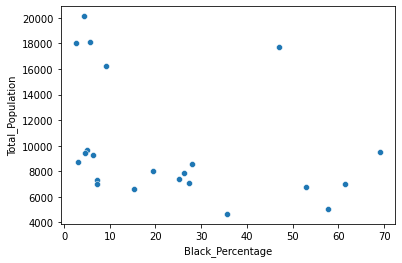

In [16]:
sns.scatterplot(data=Ward_demographics_df, x="Black_Percentage", y="Total_Population")

In [9]:
WP_Candidates_List = []
WP_Black_Percentage_List = []
WP_White_Percentage_List = []
WP_Hispanic_Percentage_List = []
WP_Asian_Percentage_List = []
WP_Total_List = []

In [10]:
Lydia_Edwards_CC_WP_list = ['0101','0102','0103','0104','0105','0106','0107','0108','0109','0110','0111','0112'
                            ,'0113','0114','0201','0202','0203','0204','0205','0206','0207','0301','0302','0303'
                            ,'0304']

Lydia_Edwards_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Lydia_Edwards_CC_WP_list)]
Lydia_Edwards_CVAP = Lydia_Edwards_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Lydia_Edwards_CVAP

Black_percentage_Lydia_Edwards = (Lydia_Edwards_CVAP['cvap_bla_WP_proportional'].sum()/Lydia_Edwards_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Lydia_Edwards = (Lydia_Edwards_CVAP['cvap_his_WP_proportional'].sum()/Lydia_Edwards_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Lydia_Edwards = (Lydia_Edwards_CVAP['cvap_whi_WP_proportional'].sum()/Lydia_Edwards_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Lydia_Edwards = (Lydia_Edwards_CVAP['cvap_asi_WP_proportional'].sum()/Lydia_Edwards_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Lydia_Edwards = Lydia_Edwards_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Lydia Edwards")
WP_Black_Percentage_List.append(Black_percentage_Lydia_Edwards)
WP_White_Percentage_List.append(White_percentage_Lydia_Edwards)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Lydia_Edwards)
WP_Asian_Percentage_List.append(Asian_percentage_Lydia_Edwards)

WP_Total_List.append(Total_pop_Lydia_Edwards)

print(Black_percentage_Lydia_Edwards, ' ----- ', Total_pop_Lydia_Edwards)



4.55106282175749  -----  20623.272774957462


In [11]:
Ed_Flynn_CC_WP_list = ['0306','0307','0308','0601','0602','0603','0604','0605','0606','0607','0608','0609',
                      '0701','0702','0703','0704','0705','0706','0401','0402','0403','0501','0801','0901']

Ed_Flynn_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Ed_Flynn_CC_WP_list)]
Ed_Flynn_CVAP = Ed_Flynn_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Ed_Flynn_CVAP

Black_percentage_Ed_Flynn = (Ed_Flynn_CVAP['cvap_bla_WP_proportional'].sum()/Ed_Flynn_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Ed_Flynn = (Ed_Flynn_CVAP['cvap_his_WP_proportional'].sum()/Ed_Flynn_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Ed_Flynn = (Ed_Flynn_CVAP['cvap_whi_WP_proportional'].sum()/Ed_Flynn_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Ed_Flynn = (Ed_Flynn_CVAP['cvap_asi_WP_proportional'].sum()/Ed_Flynn_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Ed_Flynn = Ed_Flynn_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Ed Flynn")
WP_Black_Percentage_List.append(Black_percentage_Ed_Flynn)
WP_White_Percentage_List.append(White_percentage_Ed_Flynn)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Ed_Flynn)
WP_Asian_Percentage_List.append(Asian_percentage_Ed_Flynn)

WP_Total_List.append(Total_pop_Ed_Flynn)

print(Black_percentage_Ed_Flynn, ' ----- ', Total_pop_Ed_Flynn)



6.022312608650661  -----  28258.07854603414


In [12]:
Frank_Baker_CC_WP_list = ['0708','0709','0710','1303','0305','0306','0307','0308','0309','0310','1501','1503','1504',
                      '1506','1507','1508','1509','1602','1604','1605','1606','1607','1608','1609','1610','1611',
                      '1612','1713','0115','0802','0806','0707']

Frank_Baker_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Frank_Baker_CC_WP_list)]
Frank_Baker_CVAP = Frank_Baker_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Frank_Baker_CVAP

Black_percentage_Frank_Baker = (Frank_Baker_CVAP['cvap_bla_WP_proportional'].sum()/Frank_Baker_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Frank_Baker = (Frank_Baker_CVAP['cvap_his_WP_proportional'].sum()/Frank_Baker_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Frank_Baker= (Frank_Baker_CVAP['cvap_whi_WP_proportional'].sum()/Frank_Baker_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Frank_Baker = (Frank_Baker_CVAP['cvap_asi_WP_proportional'].sum()/Frank_Baker_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Frank_Baker = Frank_Baker_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Frank Baker")
WP_Black_Percentage_List.append(Black_percentage_Frank_Baker)
WP_White_Percentage_List.append(White_percentage_Frank_Baker)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Frank_Baker)
WP_Asian_Percentage_List.append(Asian_percentage_Frank_Baker)

WP_Total_List.append(Total_pop_Frank_Baker)

print(Black_percentage_Frank_Baker, ' ----- ', Total_pop_Frank_Baker)



16.590448627149947  -----  35438.861851123394


In [13]:
Andrea_Campbell_CC_WP_list = ['1401','1402','1403','1404','1406','1407','1408','1409','1410','1411','1412','1413',
                             '1502','1505','1603','1701','1702','1703','1704','1705','1706','1707','1708','1709',
                             '1710','1711','1712','1714','1801','1807','1601','1912']

Andrea_Campbell_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Andrea_Campbell_CC_WP_list)]
Andrea_Campbell_CVAP = Andrea_Campbell_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Andrea_Campbell_CVAP

Black_percentage_Andrea_Campbell = (Andrea_Campbell_CVAP['cvap_bla_WP_proportional'].sum()/Andrea_Campbell_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Andrea_Campbell = (Andrea_Campbell_CVAP['cvap_his_WP_proportional'].sum()/Andrea_Campbell_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Andrea_Campbell= (Andrea_Campbell_CVAP['cvap_whi_WP_proportional'].sum()/Andrea_Campbell_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Andrea_Campbell = (Andrea_Campbell_CVAP['cvap_asi_WP_proportional'].sum()/Andrea_Campbell_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Andrea_Campbell = Andrea_Campbell_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Andrea Campbell")
WP_Black_Percentage_List.append(Black_percentage_Andrea_Campbell)
WP_White_Percentage_List.append(White_percentage_Andrea_Campbell)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Andrea_Campbell)
WP_Asian_Percentage_List.append(Asian_percentage_Andrea_Campbell)

WP_Total_List.append(Total_pop_Andrea_Campbell)

print(Black_percentage_Andrea_Campbell, ' ----- ', Total_pop_Andrea_Campbell)



61.126374139190496  -----  18238.22005605692


In [14]:
Ricardo_Arryo_CC_WP_list = ['1805','1806','1808','1812','1813','1814','1815','1816','1817','1818','1819','1821',
                           '1823','1820','1809','1810','1811','1822','1910','1911','1913','2002','2004','2008',
                           '2009','1405','1414','1802','1803','1804']

Ricardo_Arryo_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Ricardo_Arryo_CC_WP_list)]
Ricardo_Arryo_CVAP = Ricardo_Arryo_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Ricardo_Arryo_CVAP

Black_percentage_Ricardo_Arryo = (Ricardo_Arryo_CVAP['cvap_bla_WP_proportional'].sum()/Ricardo_Arryo_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Ricardo_Arryo = (Ricardo_Arryo_CVAP['cvap_his_WP_proportional'].sum()/Ricardo_Arryo_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Ricardo_Arryo= (Ricardo_Arryo_CVAP['cvap_whi_WP_proportional'].sum()/Ricardo_Arryo_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Ricardo_Arryo = (Ricardo_Arryo_CVAP['cvap_asi_WP_proportional'].sum()/Ricardo_Arryo_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Ricardo_Arryo = Ricardo_Arryo_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Ricardo Arroyo")
WP_Black_Percentage_List.append(Black_percentage_Ricardo_Arryo)
WP_White_Percentage_List.append(White_percentage_Ricardo_Arryo)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Ricardo_Arryo)
WP_Asian_Percentage_List.append(Asian_percentage_Ricardo_Arryo)

WP_Total_List.append(Total_pop_Ricardo_Arryo)

print(Black_percentage_Ricardo_Arryo, ' ----- ', Total_pop_Ricardo_Arryo)



47.782675057707294  -----  20014.26073332061


In [15]:
Matt_OMalley_CC_WP_list = ['1006','1007','1008','1009','1104','1105','1106','1107','1108','1109','1110','1901',
                          '1902','1903','1904','1905','1906','1907','1908','1909','2001','2003','2005','2006','2007',
                          '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

Matt_OMalley_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Matt_OMalley_CC_WP_list)]
Matt_OMalley_CVAP = Matt_OMalley_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Matt_OMalley_CVAP

Black_percentage_Matt_OMalley = (Matt_OMalley_CVAP['cvap_bla_WP_proportional'].sum()/Matt_OMalley_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Matt_OMalley = (Matt_OMalley_CVAP['cvap_his_WP_proportional'].sum()/Matt_OMalley_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Matt_OMalley= (Matt_OMalley_CVAP['cvap_whi_WP_proportional'].sum()/Matt_OMalley_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Matt_OMalley = (Matt_OMalley_CVAP['cvap_asi_WP_proportional'].sum()/Matt_OMalley_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Matt_OMalley = Matt_OMalley_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Matt O'Malley")
WP_Black_Percentage_List.append(Black_percentage_Matt_OMalley)
WP_White_Percentage_List.append(White_percentage_Matt_OMalley)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Matt_OMalley)
WP_Asian_Percentage_List.append(Asian_percentage_Matt_OMalley)

WP_Total_List.append(Total_pop_Matt_OMalley)

print(Black_percentage_Matt_OMalley, ' ----- ', Total_pop_Matt_OMalley)




10.127970529180526  -----  20737.39143622807


In [16]:
Kim_Janey_CC_WP_list = ['0803','0804','0807','0903','0904','0905','1101','1102','1103','1201','1202','1203','1204',
                       '1205','1206','1207','1208','1209','0805','1301','1302','1304','0404','0902','0405',
                       '0408','0409']

Kim_Janey_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Kim_Janey_CC_WP_list)]
Kim_Janey_CVAP = Kim_Janey_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Kim_Janey_CVAP

Black_percentage_Kim_Janey = (Kim_Janey_CVAP['cvap_bla_WP_proportional'].sum()/Kim_Janey_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Kim_Janey = (Kim_Janey_CVAP['cvap_his_WP_proportional'].sum()/Kim_Janey_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Kim_Janey= (Kim_Janey_CVAP['cvap_whi_WP_proportional'].sum()/Kim_Janey_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Kim_Janey = (Kim_Janey_CVAP['cvap_asi_WP_proportional'].sum()/Kim_Janey_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Kim_Janey = Kim_Janey_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Kim Janey")
WP_Black_Percentage_List.append(Black_percentage_Kim_Janey)
WP_White_Percentage_List.append(White_percentage_Kim_Janey)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Kim_Janey)
WP_Asian_Percentage_List.append(Asian_percentage_Kim_Janey)

WP_Total_List.append(Total_pop_Kim_Janey)

print(Black_percentage_Kim_Janey, ' ----- ', Total_pop_Kim_Janey)



35.49334329911713  -----  21079.54088890094


In [17]:
Kenzie_Bok_CC_WP_list = ['0503','0504','0505','0506','0507','0508','0509','0510','0511','0406','0407','0410',
                        '0502','052A','1001','1002','1003','1004','1005','0305','2101','2102']

Kenzie_Bok_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Kenzie_Bok_CC_WP_list)]
Kenzie_Bok_CVAP = Kenzie_Bok_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Kenzie_Bok_CVAP

Black_percentage_Kenzie_Bok = (Kenzie_Bok_CVAP['cvap_bla_WP_proportional'].sum()/Kenzie_Bok_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Kenzie_Bok = (Kenzie_Bok_CVAP['cvap_his_WP_proportional'].sum()/Kenzie_Bok_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Kenzie_Bok= (Kenzie_Bok_CVAP['cvap_whi_WP_proportional'].sum()/Kenzie_Bok_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Kenzie_Bok = (Kenzie_Bok_CVAP['cvap_asi_WP_proportional'].sum()/Kenzie_Bok_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Kenzie_Bok = Kenzie_Bok_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Kenzie Bok")
WP_Black_Percentage_List.append(Black_percentage_Kenzie_Bok)
WP_White_Percentage_List.append(White_percentage_Kenzie_Bok)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Kenzie_Bok)
WP_Asian_Percentage_List.append(Asian_percentage_Kenzie_Bok)

WP_Total_List.append(Total_pop_Kenzie_Bok)


print(Black_percentage_Kenzie_Bok, ' ----- ', Total_pop_Kenzie_Bok)



5.961184636686185  -----  27768.75933712168


In [18]:
Liz_Breadon_CC_WP_list = ['2103','2104','2105','2106','2107','2108','2201','2202','2109','2110','2111','2112',
                         '2113','2114','2115','2116','2203','2204','2205','2206','2207','2208','2209','2210','2211',
                         '2212','2213']

Liz_Breadon_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'].isin(Liz_Breadon_CC_WP_list)]
Liz_Breadon_CVAP = Liz_Breadon_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
Liz_Breadon_CVAP

Black_percentage_Liz_Breadon = (Liz_Breadon_CVAP['cvap_bla_WP_proportional'].sum()/Liz_Breadon_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_Liz_Breadon = (Liz_Breadon_CVAP['cvap_his_WP_proportional'].sum()/Liz_Breadon_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_Liz_Breadon= (Liz_Breadon_CVAP['cvap_whi_WP_proportional'].sum()/Liz_Breadon_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_Liz_Breadon = (Liz_Breadon_CVAP['cvap_asi_WP_proportional'].sum()/Liz_Breadon_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_Liz_Breadon = Liz_Breadon_CVAP['cvap_total_WP_proportional'].sum()


WP_Candidates_List.append("Liz Breadon")
WP_Black_Percentage_List.append(Black_percentage_Liz_Breadon)
WP_White_Percentage_List.append(White_percentage_Liz_Breadon)
WP_Hispanic_Percentage_List.append(Hispanic_percentage_Liz_Breadon)
WP_Asian_Percentage_List.append(Asian_percentage_Liz_Breadon)

WP_Total_List.append(Total_pop_Liz_Breadon)

print(Black_percentage_Liz_Breadon, ' ----- ', Total_pop_Liz_Breadon)



6.168894729937923  -----  20072.67489722204


In [19]:
City_Councilor_District_Demographics = pd.DataFrame(columns = ['City_Councilor','Total_Population','Black_Percentage',
                                                              'White_Percentage','Hispanic_Percentage',
                                                              'Asian_Percentage'])
City_Councilor_District_Demographics['City_Councilor'] = WP_Candidates_List
City_Councilor_District_Demographics['Total_Population'] = WP_Total_List
City_Councilor_District_Demographics['Black_Percentage'] = WP_Black_Percentage_List
City_Councilor_District_Demographics['White_Percentage'] = WP_White_Percentage_List
City_Councilor_District_Demographics['Hispanic_Percentage'] = WP_Hispanic_Percentage_List
City_Councilor_District_Demographics['Asian_Percentage'] = WP_Asian_Percentage_List

City_Councilor_District_Demographics


,City_Councilor,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage
0,Lydia Edwards,20623.272775,4.551063,70.352974,17.587262,5.959225
1,Ed Flynn,28258.078546,6.022313,71.468253,7.880510,12.837619
2,Frank Baker,35438.861851,16.590449,55.821249,10.065098,15.337797
3,Andrea Campbell,18238.220056,61.126374,11.516696,20.061169,5.739596
4,Ricardo Arroyo,20014.260733,47.782675,30.302888,18.515551,1.899813
5,Matt O'Malley,20737.391436,10.127971,64.760939,16.285177,6.069774
6,Kim Janey,21079.540889,35.493343,37.007349,19.286946,5.725922
7,Kenzie Bok,27768.759337,5.961185,70.787081,9.911444,10.302392
8,Liz Breadon,20072.674897,6.168895,70.545774,9.774298,11.089399


In [41]:
City_Councilor_District_Demographics.to_csv("City_Councilor_District_Demographics.csv", encoding="utf-8")

In [20]:
WP_Code_List = []
Black_percentage_WP_List = []
Hispanic_percentage_WP_List = []
White_percentage_WP_List = []
Asian_percentage_WP_List = []
Total_pop_WP_List = []

i = 0
for WP in list(Merged_CVAP['WP_Code'].unique()):
    Ward_Precinct_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'] == WP]
    
    Ward_Precinct_CVAP = Ward_Precinct_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
    
    
    Black_percentage_WP = (Ward_Precinct_CVAP['cvap_bla_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
    Hispanic_percentage_WP = (Ward_Precinct_CVAP['cvap_his_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
    White_percentage_WP = (Ward_Precinct_CVAP['cvap_whi_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
    Asian_percentage_WP = (Ward_Precinct_CVAP['cvap_asi_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
    Total_pop_WP = Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum()
    
    #print(White_percentage_WP)
    
    WP_Code_List.append(WP)
    Black_percentage_WP_List.append(Black_percentage_WP)
    Hispanic_percentage_WP_List.append(Hispanic_percentage_WP)
    White_percentage_WP_List.append(White_percentage_WP)
    Asian_percentage_WP_List.append(Asian_percentage_WP)
    Total_pop_WP_List.append(Total_pop_WP)
    
    #i =+ 1
    #print(i)
    
    

    

In [21]:
WP_Demographics = pd.DataFrame(columns = ['Ward_Precinct','Total_Population','Black_Percentage','White_Percentage',
                                          'Hispanic_Percentage', 'Asian_Percentage'])

WP_Demographics

,Ward_Precinct,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage


In [18]:
WP_Code_List

['2112',
 '2110',
 '2114',
 '2115',
 '2111',
 '2113',
 '2108',
 '2109',
 '2103',
 '2105',
 '2107',
 '2203',
 '1713',
 '1611',
 '1612',
 '1714',
 '1704',
 '1712',
 '1801',
 '2102',
 '2101',
 '0410',
 '0510',
 '052A',
 '2201',
 '2104',
 '2202',
 '0305',
 '2205',
 '2212',
 '2211',
 '0507',
 '0508',
 '0509',
 '0506',
 '0511',
 '0502',
 '1004',
 '1008',
 '1009',
 '1903',
 '1902',
 '0409',
 '0407',
 '1003',
 '0904',
 '1001',
 '1002',
 '1005',
 '0408',
 '0903',
 '2106',
 '1820',
 '1816',
 '1817',
 '1819',
 '1818',
 '1007',
 '1006',
 '1901',
 '1905',
 '1904',
 '1909',
 '2116',
 '2209',
 '2208',
 '2016',
 '2015',
 '2003',
 '2005',
 '2010',
 '2014',
 '1823',
 '1906',
 '1908',
 '1911',
 '1913',
 '2004',
 '2007',
 '2001',
 '2002',
 '2006',
 '1907',
 '2019',
 '1110',
 '1109',
 '1108',
 '2020',
 '2017',
 '2012',
 '2018',
 '2011',
 '2008',
 '1822',
 '1811',
 '2009',
 '1812',
 '2013',
 '1813',
 '1603',
 '1706',
 '1709',
 '1711',
 '1606',
 '1608',
 '1708',
 '1604',
 '1601',
 '1702',
 '1703',
 '1705',
 

In [19]:
Black_percentage_WP_List

[5.9793380779332574,
 3.5696240793159624,
 0.004140424005617568,
 3.2175896519693317,
 3.147687835975368,
 2.8951733964030626,
 14.865889526728193,
 4.060804801583161,
 4.226964644639939,
 4.986193935685488,
 5.649661471023027,
 2.9111414634351553,
 29.91112158062494,
 20.418734811903548,
 6.172838477040441,
 42.646900717517696,
 48.8458166701911,
 66.38098398699464,
 77.1388818322005,
 5.775715396379373,
 4.561736939271363,
 6.648171548250173,
 3.090902922146919,
 5.68546371431622,
 8.804393651293717,
 1.0458151961984805,
 5.2076383182565325,
 7.238572528866523,
 10.063485387833886,
 2.778662960748379,
 5.058225746037066,
 0.869735831427872,
 1.4382598752862377,
 1.594521891344838,
 3.060172642695416,
 0.35212660920280225,
 7.000780629024948,
 13.74386198513492,
 14.04213260985756,
 7.859427468986959,
 4.8342475811228764,
 4.493550554485832,
 9.544441257452226,
 10.85481457306876,
 9.183353177112986,
 23.549435480486228,
 24.527305834137277,
 16.132152578190112,
 21.872295084548398,
 

In [20]:
Hispanic_percentage_WP_List

[7.267957159430519,
 4.350861073878912,
 3.630844100518895,
 5.377408213155945,
 6.81154325254231,
 8.833557660805168,
 4.086361918062665,
 11.628046059188756,
 13.091951475765612,
 10.625797361093516,
 10.888269427344907,
 9.239544922401159,
 8.530207338797998,
 5.252082754197619,
 0.17951489556455294,
 16.393821901277725,
 25.369380306377398,
 9.572422538179035,
 12.399312019502384,
 13.751896764332693,
 10.486254359603773,
 9.082239064274141,
 12.799441116162447,
 13.409120729312557,
 8.957696500210298,
 16.133066417493303,
 12.050636089014594,
 8.210191415346891,
 13.15813852671053,
 19.217688889848937,
 10.154514135321387,
 7.6103878325926715,
 7.966118011228486,
 7.850350780785418,
 6.067626471303171,
 5.71624977572527,
 20.419812130947193,
 24.899904942167048,
 13.330670889755346,
 20.44130463500003,
 9.04156586686337,
 3.2346659176238073,
 15.850039683124168,
 11.518768319155923,
 15.202778160682701,
 21.94837656543997,
 38.61708856157583,
 28.38464311667425,
 9.631324759472342

In [12]:
import csv
# opening the csv file in 'w+' mode
file = open('WP_Code_List.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(WP_Code_List)

In [13]:
import csv
# opening the csv file in 'w+' mode
file = open('Total_pop_WP_List.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(Total_pop_WP_List)

In [16]:
import csv
    
outfile = open('Black_percentage_WP_List.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], Black_percentage_WP_List))
outfile.close()

In [ ]:
import csv
    
outfile = open('White_percentage_WP_List.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], White_percentage_WP_List))
outfile.close()

In [ ]:
import csv
    
outfile = open('Hispanic_percentage_WP_List.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], Hispanic_percentage_WP_List))
outfile.close()

In [17]:
import csv
    
outfile = open('Asian_percentage_WP_List.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], Asian_percentage_WP_List))
outfile.close()

In [ ]:
WP_Demographics['Asian_Percentage'] = Asian_percentage_WP_List

In [ ]:
WP_Demographics

In [ ]:
WP_Demographics['Ward_Precinct'] = WP_Code_List
WP_Demographics['Total_Population'] = Total_pop_WP_List
WP_Demographics['Black_Percentage'] = Black_percentage_WP_List
WP_Demographics['White_Percentage'] = White_percentage_WP_List
WP_Demographics['Hispanic_Percentage'] = Hispanic_percentage_WP_List
WP_Demographics['Asian_Percentage'] = Asian_percentage_WP_List
    
WP_Demographics  

In [11]:
list(Merged_CVAP['WP_Code'].unique())

['2112',
 '2110',
 '2114',
 '2115',
 '2111',
 '2113',
 '2108',
 '2109',
 '2103',
 '2105',
 '2107',
 '2203',
 '1713',
 '1611',
 '1612',
 '1714',
 '1704',
 '1712',
 '1801',
 '2102',
 '2101',
 '0410',
 '0510',
 '052A',
 '2201',
 '2104',
 '2202',
 '0305',
 '2205',
 '2212',
 '2211',
 '0507',
 '0508',
 '0509',
 '0506',
 '0511',
 '0502',
 '1004',
 '1008',
 '1009',
 '1903',
 '1902',
 '0409',
 '0407',
 '1003',
 '0904',
 '1001',
 '1002',
 '1005',
 '0408',
 '0903',
 '2106',
 '1820',
 '1816',
 '1817',
 '1819',
 '1818',
 '1007',
 '1006',
 '1901',
 '1905',
 '1904',
 '1909',
 '2116',
 '2209',
 '2208',
 '2016',
 '2015',
 '2003',
 '2005',
 '2010',
 '2014',
 '1823',
 '1906',
 '1908',
 '1911',
 '1913',
 '2004',
 '2007',
 '2001',
 '2002',
 '2006',
 '1907',
 '2019',
 '1110',
 '1109',
 '1108',
 '2020',
 '2017',
 '2012',
 '2018',
 '2011',
 '2008',
 '1822',
 '1811',
 '2009',
 '1812',
 '2013',
 '1813',
 '1603',
 '1706',
 '1709',
 '1711',
 '1606',
 '1608',
 '1708',
 '1604',
 '1601',
 '1702',
 '1703',
 '1705',
 

In [22]:
Ward_Precinct_CVAP = Merged_CVAP[Merged_CVAP['WP_Code'] == '2112']
    
Ward_Precinct_CVAP = Ward_Precinct_CVAP.drop_duplicates(subset=['TRACTCE10','BLKGRPCE10'])
    
    
Black_percentage_WP = (Ward_Precinct_CVAP['cvap_bla_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
Hispanic_percentage_WP = (Ward_Precinct_CVAP['cvap_his_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
White_percentage_WP = (Ward_Precinct_CVAP['cvap_whi_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
Asian_percentage_WP = (Ward_Precinct_CVAP['cvap_asi_WP_proportional'].sum()/Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum())*100
Total_pop_WP = Ward_Precinct_CVAP['cvap_total_WP_proportional'].sum()

print(Black_percentage_WP)
print(Hispanic_percentage_WP)




5.9793380779332574
7.267957159430519


In [23]:
WP_Demographics = pd.DataFrame(columns = ['Ward_Precinct','Total_Population','Black_Percentage','White_Percentage',
                                          'Hispanic_Percentage', 'Asian_Percentage'])

WP_Demographics['Ward_Precinct'] = WP_Code_List
WP_Demographics['Total_Population'] = Total_pop_WP_List
WP_Demographics['Black_Percentage'] = Black_percentage_WP_List
WP_Demographics['White_Percentage'] = White_percentage_WP_List
WP_Demographics['Hispanic_Percentage'] = Hispanic_percentage_WP_List
WP_Demographics['Asian_Percentage'] = Asian_percentage_WP_List
    
WP_Demographics  

,Ward_Precinct,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage
0,2112,1842.037452,5.979338,79.218061,7.267957,6.479181
1,2110,1431.704127,3.569624,67.842418,4.350861,13.823015
2,2114,1142.777401,0.004140,88.336450,3.630844,6.859272
3,2115,1263.838204,3.217590,83.608937,5.377408,6.214153
4,2111,2250.820054,3.147688,80.377428,6.811543,5.861536
...,...,...,...,...,...,...
250,0101,2220.579874,1.825871,73.531464,17.549266,3.137905
251,0106,1416.327242,4.803486,48.777906,38.536196,5.111586
252,0107,2010.145186,1.608515,47.712951,39.875868,7.701656
253,0108,1795.597814,2.187274,52.975413,34.078403,8.846963


<AxesSubplot:xlabel='Total_Population', ylabel='Count'>

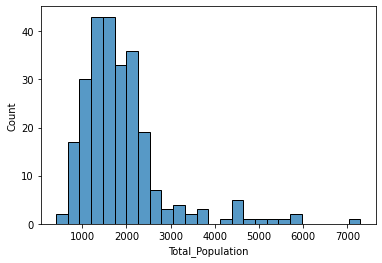

In [28]:
sns.histplot(data=WP_Demographics, x="Total_Population")

In [43]:
WP_Demographics[WP_Demographics['Black_Percentage'] > 30]

,Ward_Precinct,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage
15,1714,1499.157772,42.646901,31.904287,16.393822,5.364637
16,1704,2318.597859,48.845817,18.902543,25.369380,3.606352
17,1712,911.331776,66.380984,12.887851,9.572423,8.423969
18,1801,2428.146836,77.138882,6.289138,12.399312,1.147659
54,1817,2122.317282,46.923201,22.415003,24.516921,4.700138
...,...,...,...,...,...,...
210,1503,891.602002,41.065671,21.890107,33.613795,2.450882
211,1507,934.588420,56.685913,13.287255,18.997341,8.010853
212,1504,2274.615934,54.577733,13.518540,8.317780,21.803018
244,1508,1207.848026,37.814469,15.987463,21.762652,21.621423


In [49]:
#DA_2018_Prelim_df.loc[(DA_2018_Prelim_df['Black Percentage'] > DA_2018_Prelim_df['White Percentage']) & (DA_2018_Prelim_df['Black Percentage']> DA_2018_Prelim_df['Hispanic Percentage']) & (DA_2018_Prelim_df['Black Percentage']> DA_2018_Prelim_df['Asian Percentage']), 'Black plurality (Y/N)'] = 'Y'
WP_Demographics.loc[(WP_Demographics['Black_Percentage'] > WP_Demographics['White_Percentage']) & (WP_Demographics['Black_Percentage']> WP_Demographics['Hispanic_Percentage']) & (WP_Demographics['Black_Percentage']> WP_Demographics['Asian_Percentage']), 'Black plurality (Y/N)'] = 'Y'


WP_Demographics





,Ward_Precinct,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage,Black plurality (Y/N)
0,2112,1842.037452,5.979338,79.218061,7.267957,6.479181,NaN
1,2110,1431.704127,3.569624,67.842418,4.350861,13.823015,NaN
2,2114,1142.777401,0.004140,88.336450,3.630844,6.859272,NaN
3,2115,1263.838204,3.217590,83.608937,5.377408,6.214153,NaN
4,2111,2250.820054,3.147688,80.377428,6.811543,5.861536,NaN
...,...,...,...,...,...,...,...
250,0101,2220.579874,1.825871,73.531464,17.549266,3.137905,NaN
251,0106,1416.327242,4.803486,48.777906,38.536196,5.111586,NaN
252,0107,2010.145186,1.608515,47.712951,39.875868,7.701656,NaN
253,0108,1795.597814,2.187274,52.975413,34.078403,8.846963,NaN


In [50]:
WP_Demographics[WP_Demographics['White_Percentage'] < 50]

,Ward_Precinct,Total_Population,Black_Percentage,White_Percentage,Hispanic_Percentage,Asian_Percentage,Black plurality (Y/N)
15,1714,1499.157772,42.646901,31.904287,16.393822,5.364637,Y
16,1704,2318.597859,48.845817,18.902543,25.369380,3.606352,Y
17,1712,911.331776,66.380984,12.887851,9.572423,8.423969,Y
18,1801,2428.146836,77.138882,6.289138,12.399312,1.147659,Y
37,1004,2200.771019,13.743862,39.839851,24.899905,21.246633,NaN
...,...,...,...,...,...,...,...
244,1508,1207.848026,37.814469,15.987463,21.762652,21.621423,Y
245,1509,1157.876673,38.131900,22.230539,15.732823,21.670284,Y
251,0106,1416.327242,4.803486,48.777906,38.536196,5.111586,NaN
252,0107,2010.145186,1.608515,47.712951,39.875868,7.701656,NaN


In [29]:
WP_Demographics.to_csv("Boston_WP_Demographics.csv", encoding = "utf-8")

In [8]:
len(list(Merged_CVAP['WP_Code'].unique()))

255

In [42]:
ax = plt.gca()

ax.scatter([1, 2, 3], [3, 2, 1], color="b")
ax.scatter([1.5, 2.5, 3.5], [1, 2, 3], color="r")

NameError: name 'plt' is not defined

In [ ]:
sns.scatterplot(data=City_Councilor_District_Demographics, x="City_Councilor", y="Total_Population", hue="time", style="time")



